In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import os

files = [f"dds_datasets/nyt{i}.csv" for i in range(1, 32)]

# List to hold data from all files
all_data = []

for file in files:
    if os.path.exists(file):
        df = pd.read_csv(file)
        df['Day'] = file.split('/')[-1].split('.')[0]  # Extract day from file name
        all_data.append(df)

# Concatenate all data into a single DataFrame
data = pd.concat(all_data, ignore_index=True)


age_bins = [0, 18, 25, 35, 45, 55, 65, float('inf')]
age_labels = ["<18", "18-24", "25-34", "35-44", "45-54", "55-64", "65+"]

data['AgeGroup'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

data_signed_in = data[data['Signed_In'] == 1]


In [41]:

grouped_data = data_signed_in.groupby('AgeGroup')

age_group_metrics = grouped_data['Impressions'].agg([
    'count',
    ('Quantile (0.5)', lambda x: x.quantile(0.5)),
    'mean', 
    'median', 
    'var',
    'max'
])
age_group_metrics['CTR'] = grouped_data['Clicks'].sum() / grouped_data['Impressions'].sum()


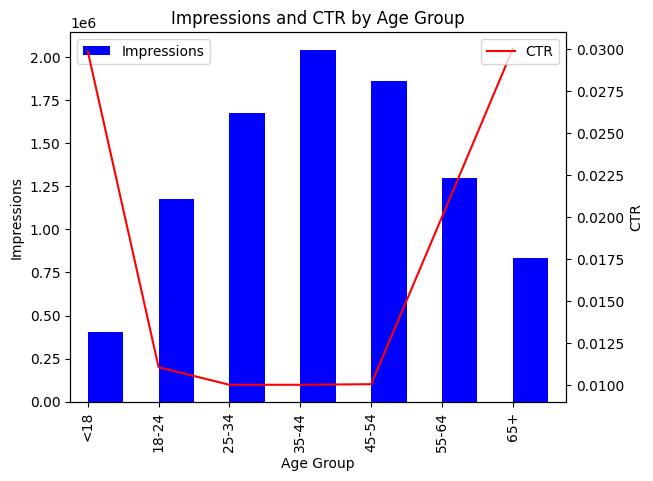

In [42]:

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
age_group_metrics['count'].plot(kind='bar', ax=ax1, position=0, color='blue', label='Impressions')
age_group_metrics['CTR'].plot(kind='line', ax=ax2, color='red', label='CTR')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Impressions')
ax2.set_ylabel('CTR')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Impressions and CTR by Age Group')
plt.show()


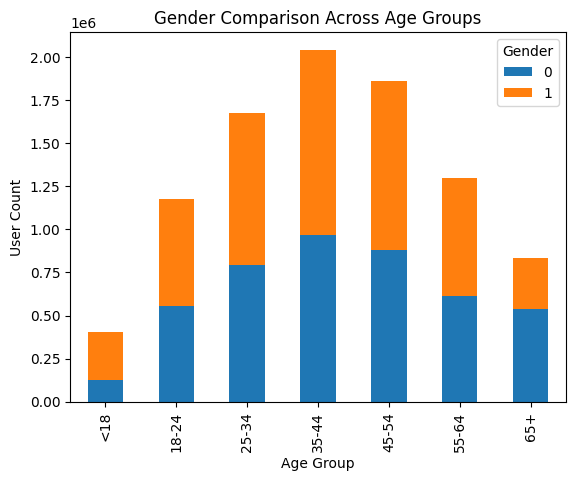

In [43]:

gender_comparison = data_signed_in.groupby(['AgeGroup', 'Gender']).size().unstack(fill_value=0)
gender_comparison.plot(kind='bar', stacked=True)
plt.xlabel('Age Group')
plt.ylabel('User Count')
plt.title('Gender Comparison Across Age Groups')
plt.show()




            count  Quantile (0.5)      mean  median       var  max       CTR
AgeGroup                                                                    
<18        402505             5.0  5.006547     5.0  5.026275   19  0.029878
18-24     1176595             5.0  4.998441     5.0  5.000016   20  0.011062
25-34     1673650             5.0  4.998146     5.0  5.002250   19  0.010017
35-44     2044613             5.0  4.997909     5.0  4.989868   20  0.010019
45-54     1859487             5.0  4.996438     5.0  4.991826   20  0.010053
55-64     1299303             5.0  4.998224     5.0  4.997220   20  0.020013
65+        836102             5.0  5.001963     5.0  4.982400   19  0.030012


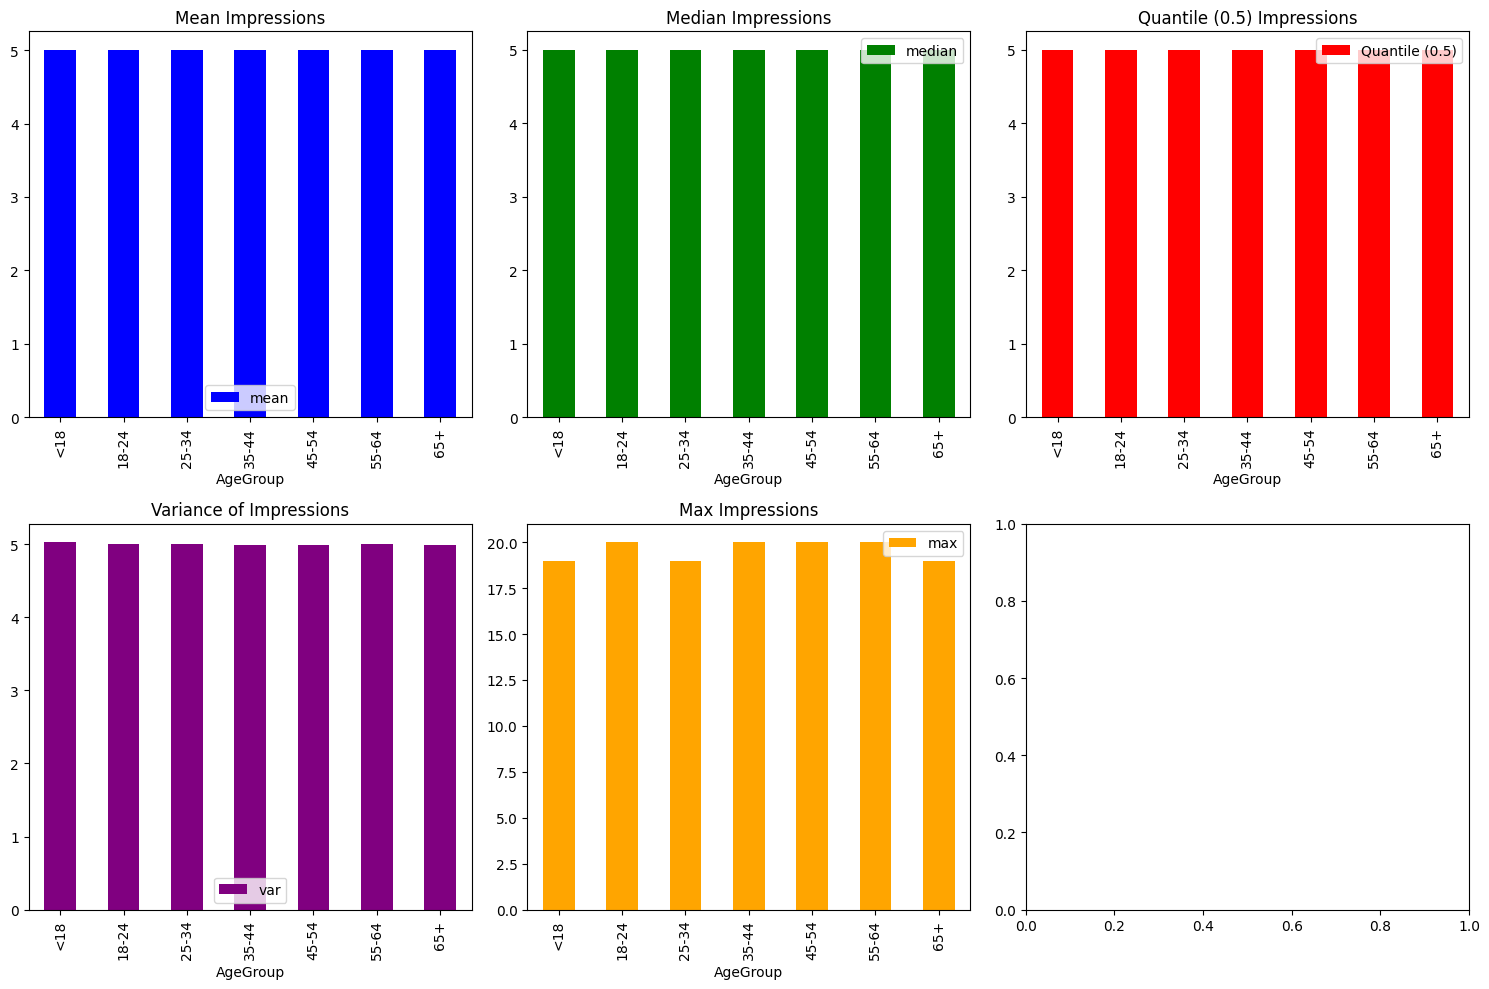

In [44]:
# квантил, середнє значення, медіану, дисперсію та максимальне значення.
final_data_frame = age_group_metrics
print(final_data_frame)

final_data_frame.to_csv('age_group_statistics.csv')

# візуалізація всіх данних
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
final_data_frame.plot(kind='bar', y='mean', ax=axes[0,0], title='Mean Impressions', color='blue')
final_data_frame.plot(kind='bar', y='median', ax=axes[0,1], title='Median Impressions', color='green')
final_data_frame.plot(kind='bar', y='Quantile (0.5)', ax=axes[0,2], title='Quantile (0.5) Impressions', color='red')
final_data_frame.plot(kind='bar', y='var', ax=axes[1,0], title='Variance of Impressions', color='purple')
final_data_frame.plot(kind='bar', y='max', ax=axes[1,1], title='Max Impressions', color='orange')

plt.tight_layout()
plt.show()


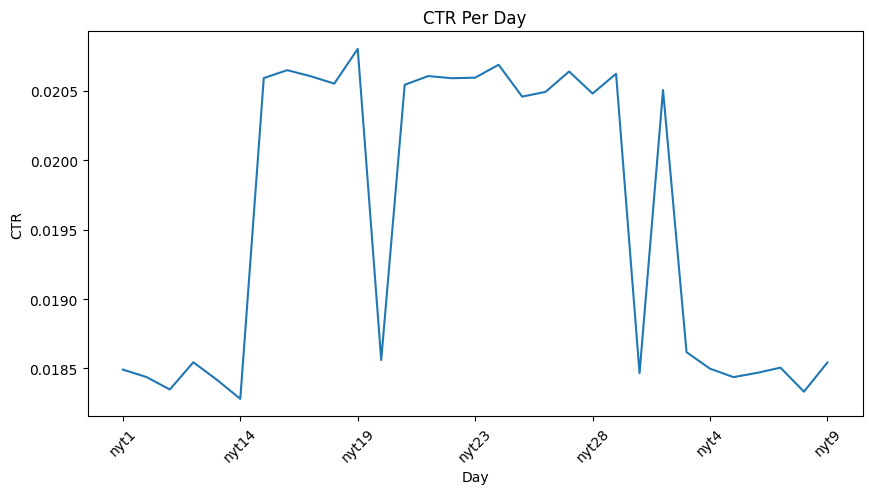

In [45]:
# Групуємо по днях і розраховуємо CTR
grouped_by_day = data.groupby('Day')
daily_ctr = grouped_by_day.apply(lambda x: x['Clicks'].sum() / x['Impressions'].sum())

daily_ctr.plot(kind='line', figsize=(10, 5))
plt.xlabel('Day')
plt.ylabel('CTR')
plt.title('CTR Per Day')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()